<a href="https://colab.research.google.com/github/Manoharjha333/transport-demand-prediction/blob/main/ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction






##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

#Description of the Transport Data

This is a dataset prepared on the demand of transport which has more than 50000 data in which we have to predict how many seats MobiTicket can sell in each ride. This dataset contains 14 different routes going to the same location Nairobi with different timings and routes.

The journey from these 14 origin points to the first stop on the outskirts of Nairobi takes approximately 8 to 9 hours from the time of departure. From the first stop on the outskirts of Nairobi to the main bus terminal, where most passengers disembark, in the Central Business District, it takes 2 to 3 hours, depending on traffic. The three stops each of these routes make in Nairobi (in order) are:
1. Kawangware: First stop on the outskirts of Nairobi
2. Westlands
3. Afya Centre: The main bus terminal where most passengers disembark

Passengers on these bus (or shuttle) rides are not only affected by Nairobi traffic during their journey in the city, but from there they must continue their journey to their final destination in Nairobi, wherever that may be. The traffic may act as a deterrent for those who have the option to avoid buses arriving in Nairobi during peak traffic hours. On the other hand, traffic can be an indication of people's movement patterns, reflecting business hours, cultural events, political events, and holidays.


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Manoharjha333/transport-demand-prediction/blob/768e7858b4a3e6ae9a00e1ed251e72226f0489e1/ML_Submission_Template.ipynb



# **Problem Statement**


#Problem Statement
This transport data departs from 14 origin points to the first stop on the outskirts of Nairobi, taking approximately 8 to 9 hours. It contains data of more than 50000. In which we have to estimate how many seats MobiTicket can sell in each ride.
It consists of 14 different routes leading to the same location Nairobi with different timings and routes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [80]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
sns.set_style('darkgrid')
import missingno as msno

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [81]:
# Load Dataset
dataset = pd.read_csv(r"/content/drive/MyDrive/Transport Demand Predction/train_revised.csv")

### Dataset First View

In [82]:
# Dataset First Look
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [83]:
# Dataset Rows & Columns count
dataset.shape

(51645, 10)

### Dataset Information

In [84]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [85]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [86]:
# Missing Values/Null Values Count
dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

<Axes: >

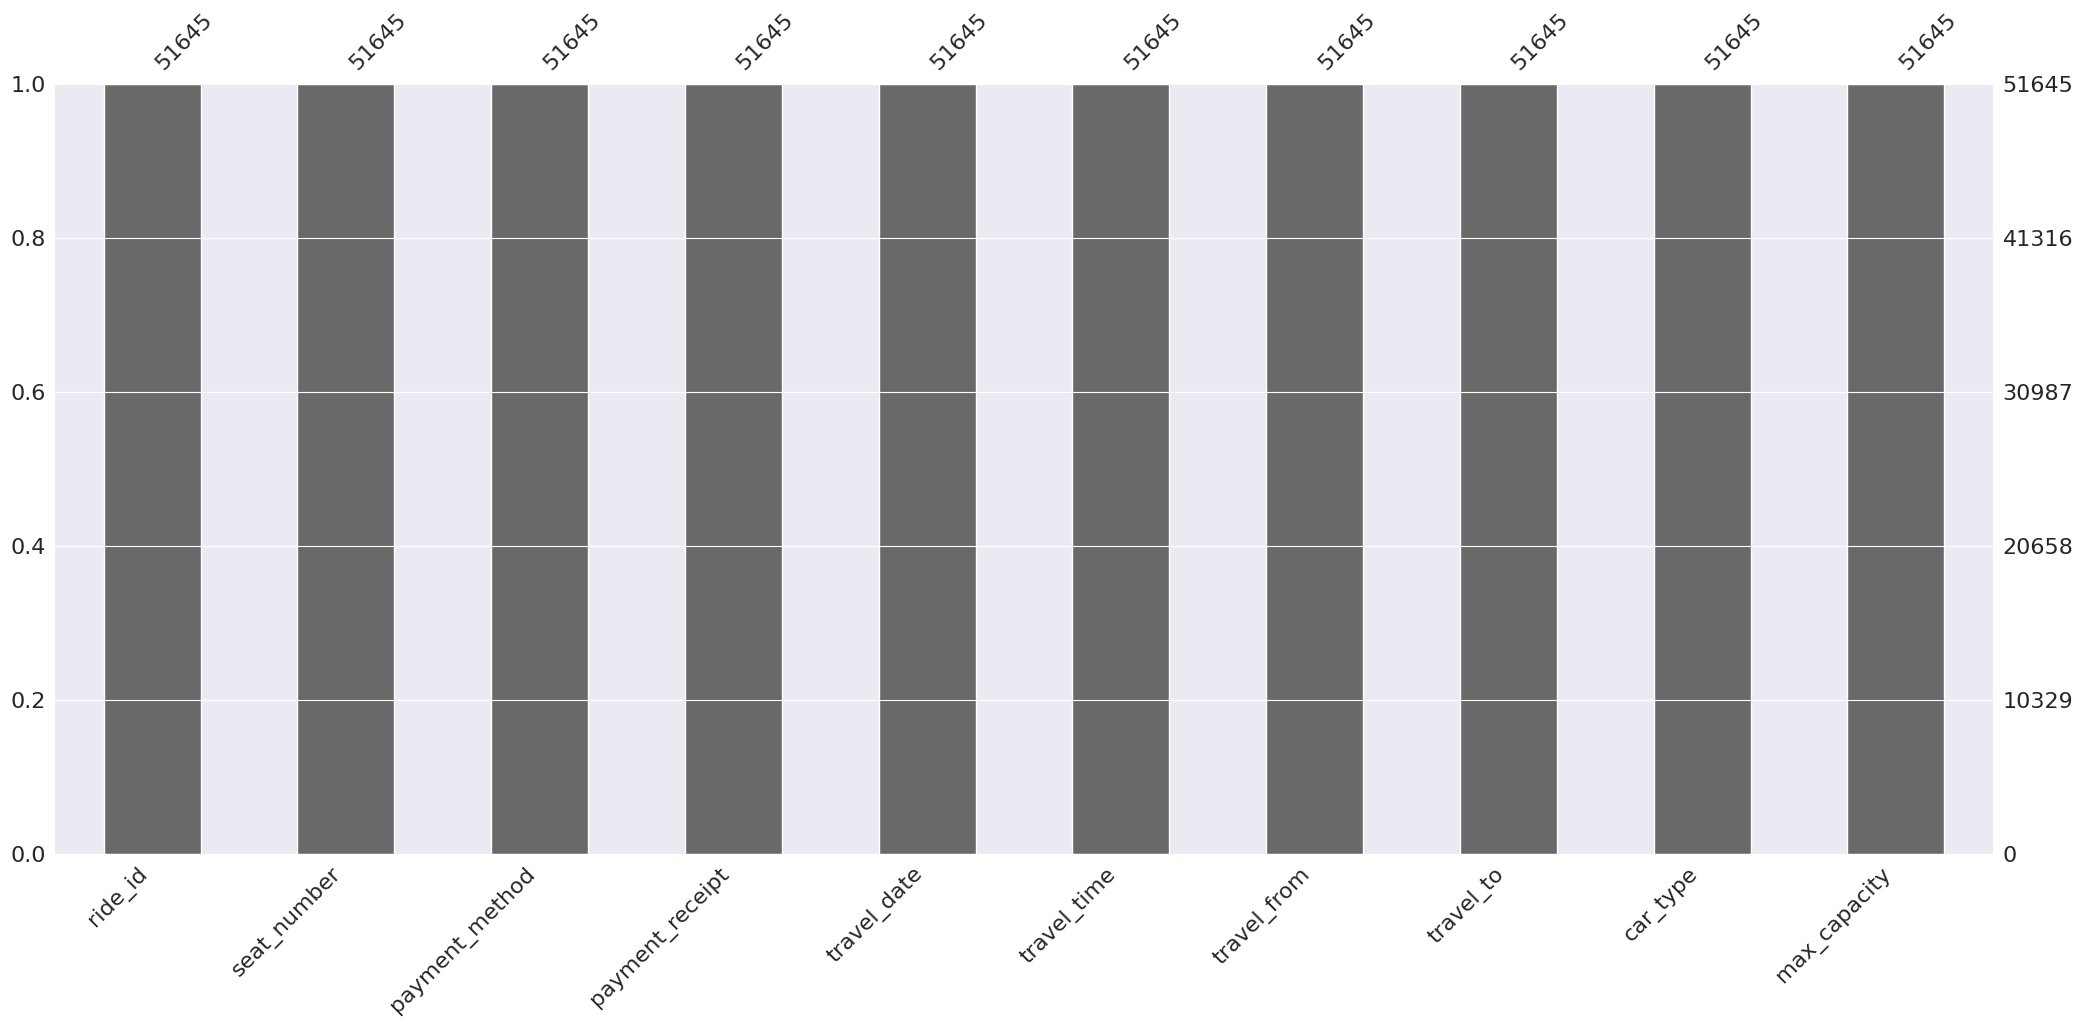

In [87]:
# Visualizing the missing values
msno.bar(dataset)

### What did you know about your dataset?

**Answer Here**

This dataset is a dataset of demand for a transport which has 51645 rows and 10 columns. In which there is no duplicate value nor any missing value.

## ***2. Understanding Your Variables***

In [88]:
# Dataset Columns
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [89]:
# Dataset Describe
dataset.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


### Variables Description

**Answer Here**

ride_id: unique ID of a vehicle on a specific route on a specific day and time

seat number: seat assigned to ticket

payment method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel from: town from which ride originated

travel to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)


max_capacity: number of seats on the vehicle


### Check Unique Values for each variable.

In [90]:
# Check Unique Values for each variable.
dataset.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [91]:
# Write your code to make your dataset analysis ready.

# Drop any columns that are not needed for analysis
dataset.drop(['payment_receipt'], axis=1, inplace=True)

In [92]:
# find which value is the most frequent in a row
dataset['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [93]:
# find which value is the most frequent in a row
dataset['travel_time'].value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
         ... 
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [94]:
dataset['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [95]:
dataset['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [96]:
dataset['max_capacity'].value_counts()

49    31985
11    19660
Name: max_capacity, dtype: int64

In [97]:
# Date and Time Handling
# Convert a date column to a datetime object
dataset['travel_date'] = pd.to_datetime(dataset['travel_date'])

# Extract year, month, and day from a datetime column
dataset['year'] = dataset['travel_date'].dt.year
dataset['month'] = dataset['travel_date'].dt.month
dataset['day'] = dataset['travel_date'].dt.day

In [98]:
# Calculation of Target varible based on the ride id
number_of_ticket = dataset.groupby('ride_id')['seat_number'].count().reset_index()
number_of_ticket

,ride_id,seat_number
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [149]:
# Merging the calculated target variable column to the dataset based on the ride_id
dataset = dataset.merge(number_of_ticket, how= 'left', on='ride_id')
dataset

,ride_id,seat_number_x,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,seat_number_y,seat_number
0,1442,15A,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,1
1,5437,14A,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,1,1
2,5710,8B,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,1,1
3,5777,19A,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,5,5
4,5778,11A,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,2018-04-20,8:00,Awendo,Nairobi,Bus,49,2018,4,20,1,1
51641,13809,18A,Mpesa,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,29,29
51642,13809,17A,Mpesa,2018-04-20,8:00,Migori,Nairobi,Bus,49,2018,4,20,29,29
51643,13796,16B,Mpesa,2018-04-20,7:08,Awendo,Nairobi,Bus,49,2018,4,20,27,27


In [150]:
# find which value is the most frequent in a row
dataset['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

### What all manipulations have you done and insights you found?

**Answer Here.**

In the Dataset, I first removed the column that I did not need to do anything special in the dataset, so I counted many columns of columns, so that I came to know that In which value the most numbers are being counted in which value, Differently separated the date, time and year. Also set a group by group by setting a target variable. Then merged the group by data. And then the value of Ride_id was counted to know how often a ride ID has been traveling with a ride ID

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

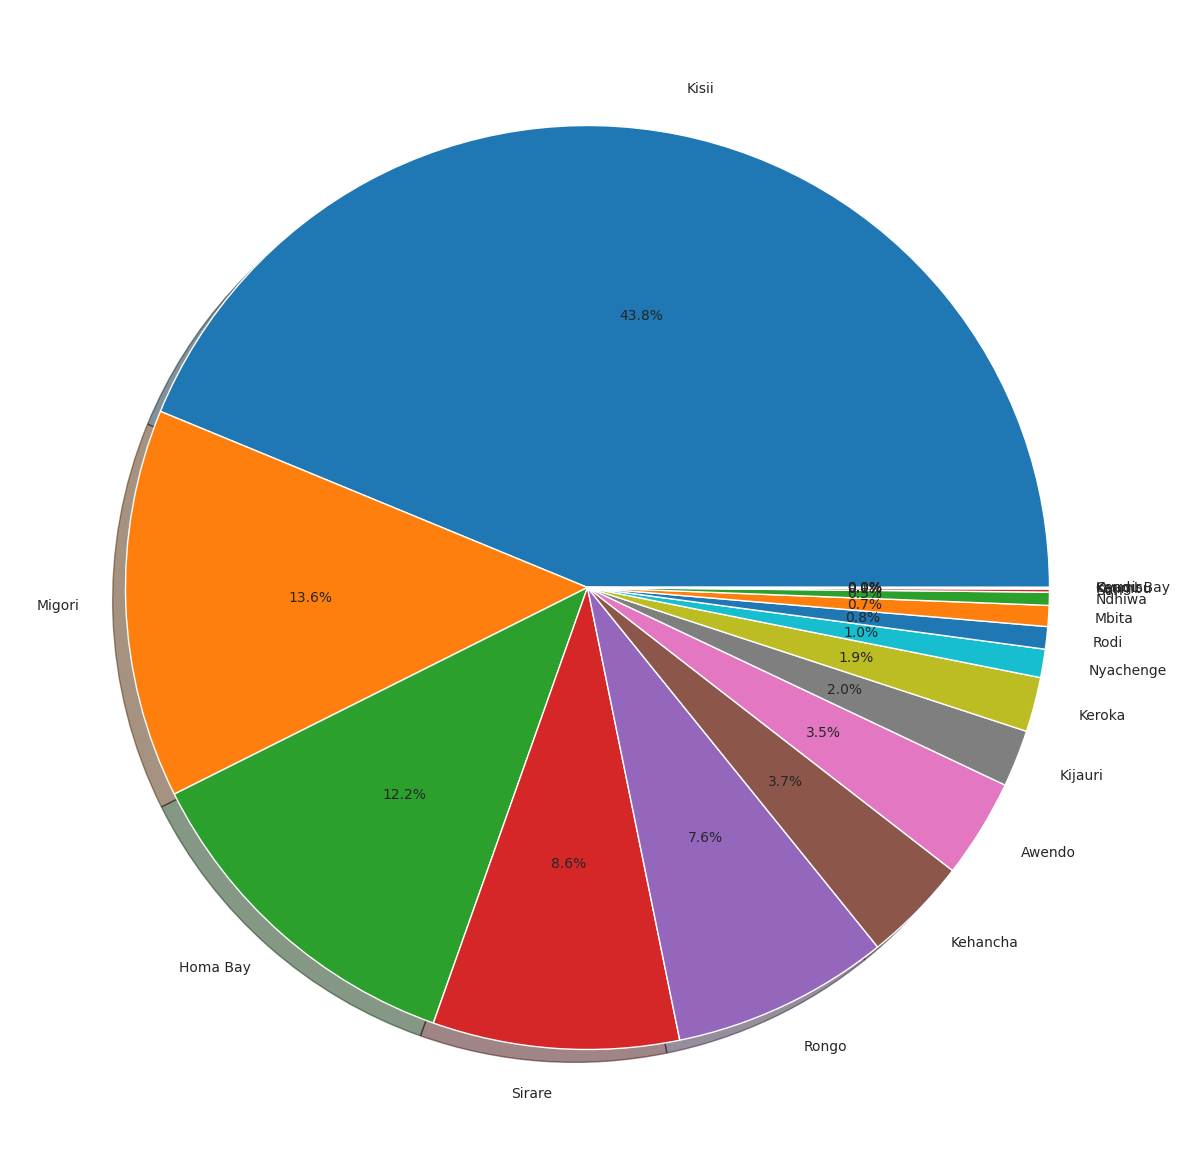

In [99]:
# Chart - 1 visualization code
chart1= dataset['travel_from'].value_counts()
fig, ax = plt.subplots(figsize =(25, 15))
ax.pie(chart1, labels = dataset['travel_from'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I had to know from where people are traveling the most, what is the ratio.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

I came to know that most people do Kissi, Migori and Homa Bay and people travel less from the remaining place.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

If we go to the recommendations of Insights so that from where most people are traveling, there is a need to focus more on more business and at the same time we can think about business growth at where people are traveling less.

#### Chart - 2

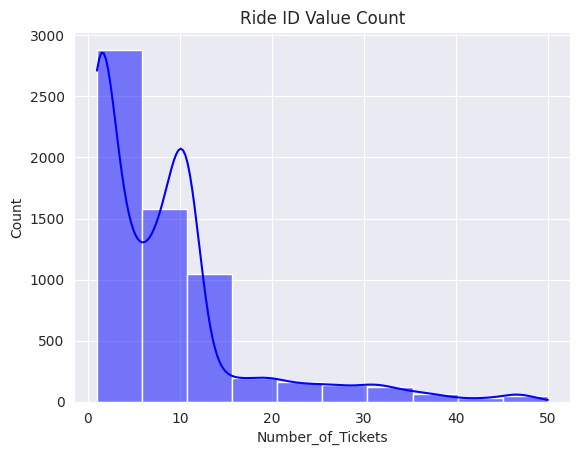

In [153]:
# Chart - 2 visualization code

# Create a histogram using sns.histplot
sns.histplot(dataset['ride_id'].value_counts(), bins=10, kde=True, color='blue')

# Add labels and a title
plt.xlabel('Number_of_Tickets')
plt.ylabel('Count')
plt.title('Ride ID Value Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I wanted to know how many times people are traveling with an ID

##### 2. What is/are the insight(s) found from the chart?

Answer Here

People have traveled maximum 50 times with an ID

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows us that our customers are traveling with us many times and if we want, we can take out an offer for it so that he will be connected with us for travel.

#### Chart - 3

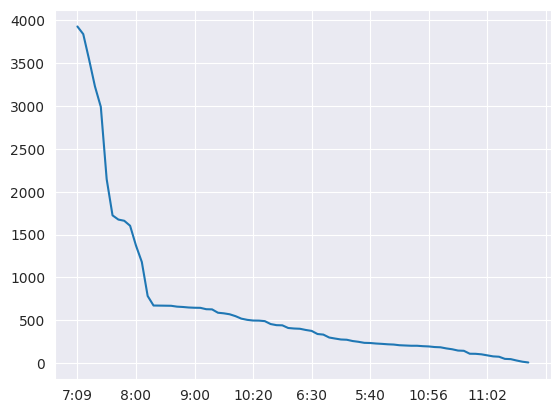

In [154]:
# Chart - 3 visualization code
dataset['travel_time'].value_counts().plot(kind='line')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because I had to know what time people travel the most

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From this I came to know that people travel the most from 7:09 to 8  and people travel work during the rest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This shows us how we can take advantage of the crowd

#### Chart - 4

In [102]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [103]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [104]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [105]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [106]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [107]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [108]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [109]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [110]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [111]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [112]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [113]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [114]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [115]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [116]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [117]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [118]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [119]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [120]:
# Expand Contraction

#### 2. Lower Casing

In [121]:
# Lower Casing

#### 3. Removing Punctuations

In [122]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [123]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [124]:
# Remove Stopwords

In [125]:
# Remove White spaces

#### 6. Rephrase Text

In [126]:
# Rephrase Text

#### 7. Tokenization

In [127]:
# Tokenization

#### 8. Text Normalization

In [128]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [129]:
# POS Taging

#### 10. Text Vectorization

In [130]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [131]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [132]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [133]:
# Transform Your data

### 6. Data Scaling

In [134]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [135]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [136]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [137]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [138]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [139]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [141]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [142]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [143]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [144]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [146]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [147]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***